This plot comprises three panels. The central panel visualizes the distribution of ratios (col1/col2) over time. The right panel displays the distribution of these ratios, emphasizing the mode. Lastly, the lower panel presents the original data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import transforms
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_and_process_data(df):
    # Calculate the 'Ratio' column as the ratio of 'Sn_y' to 'WOLF'
    df["Ratio"] = df.col1 / df.col2

    # Replace -inf (negative infinity) values with NaN in the 'Ratio' column
    df['Ratio'] = df['Ratio'].replace(-np.inf, np.nan)

    # Remove rows where 'Ratio' is positive infinity (inf)
    df = df.drop(df[df.Ratio == np.inf].index)

    # Sort the DataFrame by the 'Date' column
    df = df.sort_values('Date')

    # Set the figure size and DPI for the plot
    width_in_inches = 12
    height_in_inches = 8
    dots_per_inch = 80
    fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    plt.tight_layout()

    # Create a 5x5 grid for the subplots
    gs = GridSpec(5,5)
    gs.update(wspace=0.35, hspace=0.5)
    
    # Add a subplot for the main plot in the top left (1:4 rows, 0:3 columns)
    ax1 = fig.add_subplot(gs[1:4,0:3])

    # Create a scatter plot of 'Date' vs. 'Ratio' with specified settings
    ax1.scatter(df["Date"], df["Ratio"], alpha=1, facecolor='None', marker=',', s=10, edgecolor='blue')

    # Set the y-axis label
    ax1.set_ylabel('Ratio', fontsize=12)
    divider = make_axes_locatable(ax1)
    #ax1.xaxis.set_major_locator(yloc)
    leg = plt.legend(loc="best",fontsize= 8)
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    # Add a subplot for the SN data below the main plot
    ax0 = divider.append_axes("bottom", 0.6, sharex=ax1)

    # Create a line plot of 'Date' vs. 'Sn_y'
    ax0.plot(df["Date"], df["col1"], alpha=1, color='blue')

    # Set the y-axis label for the original subplot
    ax0.set_ylabel('col1', fontsize=12)

    # Set the x-axis label for the SN subplot
    plt.xlabel('Time (in years)', fontsize=12)

    # Add a right marginal histogram for 'Ratio'
    ax_marg_y = divider.append_axes("right", 0.9, sharey=ax1)

    # Create a horizontal histogram of 'Ratio' in the right marginal plot
    n = np.linspace(0,5,num=50) #create number of bins
    n1,x1,_=ax_marg_y.hist(df.Ratio,orientation="horizontal",facecolor='k',alpha=1,bins=n,edgecolor='k')
    base = pyplot.gca().transData
    rot = transforms.Affine2D().rotate_deg(0)
    plt.setp(ax1.get_xticklabels(), visible=False)
    ax_marg_y.grid()
    # Turn off tick labels on marginals
    ax_marg_y.spines['top'].set_visible(False)
    ax_marg_y.spines['right'].set_visible(False)
    ax_marg_y.spines['left'].set_visible(False)
    
    # Adjust x-axis tick label rotation and other settings
    plt.setp(ax_marg_y.get_yticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
    plt.setp(ax0.get_xticklabels(), rotation=0, ha="center")

   
    # Adjust spacing and layout of subplots
    plt.subplots_adjust(hspace=0.0)

    
    

    plt.gcf().subplots_adjust(bottom=0.15)
    plt.gcf().subplots_adjust(left=0.15)

In [3]:
df = pd.read_csv(r'C:\Users\ShreyaB\Documents\Mitteilungen\data\weighted_average_example.csv')
df.Date = pd.to_datetime(df.Date)

In [4]:
df.head()

,Date,col1,col2
0,1854-02-04,3,3
1,1854-03-17,2,2
2,1854-09-12,3,3
3,1855-10-20,2,2
4,1857-01-14,3,3


No handles with labels found to put in legend.


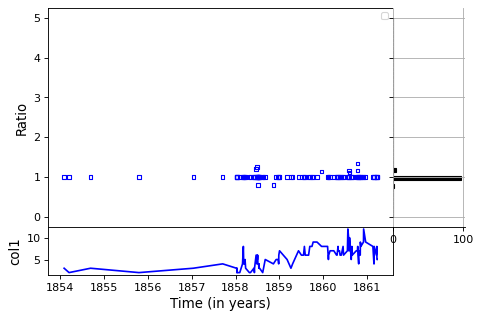

In [5]:
plot_and_process_data(df)